In [1]:
from jupyter_utils import jupyter_setup
jupyter_setup()
from utils.utils import FocalLoss
import numpy as np
import torch
import matplotlib.pyplot as plt

D:\Archiv\Studium\Master\6.-Semester\Masters_Thesis\Git\acoustic_covid_detection\python



gamma=0
area under curve: 1.412898063659668
torch.Size([10000]) torch.Size([10000])

gamma=0.1
area under curve: 1.3908119201660156
torch.Size([10000]) torch.Size([10000])

gamma=0.5
area under curve: 1.3194619417190552
torch.Size([10000]) torch.Size([10000])

gamma=1
area under curve: 1.253109097480774
torch.Size([10000]) torch.Size([10000])

gamma=4
area under curve: 1.0290287733078003
torch.Size([10000]) torch.Size([10000])


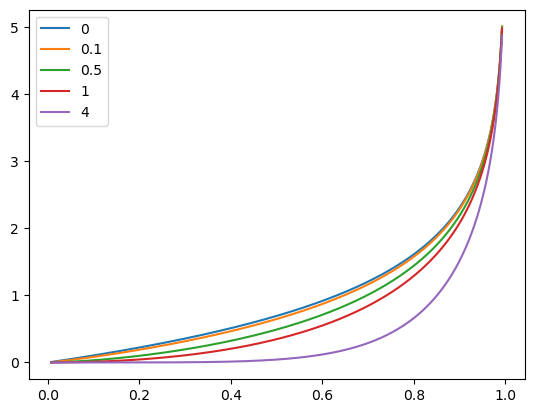

In [3]:
gammas = [0,0.1, 0.5, 1,4]
predictions = torch.arange(-5, 5, 0.001)
labels_neg = torch.zeros(len(predictions))
labels_pos = torch.ones(len(predictions))


for gamma in gammas:
    lossfunc = FocalLoss(gamma=gamma, pos_weight=1.0, reduction="none", exclude_outliers=0)
    # lossfunc = nn.BCEWithLogitsLoss(reduction="none")

    loss_pos = lossfunc(predictions, labels_pos)
    loss_neg = lossfunc(predictions, labels_neg)
    # print(loss_neg[0])
    # print(loss_neg[-1])
    
    auc=torch.mean(loss_neg)
    print(f"\ngamma={gamma}\narea under curve: {auc}")
    # loss_neg = loss_neg / auc * 1.412898063659668
    # loss_neg = loss_neg * lossfunc.calculate_normalizaiton_coefulate_normalizaiton_coef()
    # auc=torch.mean(loss_neg)
    # print(f"gamma={gamma}\narea under curve: {auc}")
    print(predictions.shape, loss_pos.shape)
    plt.plot(torch.sigmoid(predictions), loss_pos, label=f"{gamma}")
    # plt.plot(torch.sigmoid(predictions),loss_neg, label=f"{gamma}")
    plt.legend()
    